## Displaying data with Python



To display the data in a different way and open it up for analysis, we
import them into Python.

-   **Python** is not the only but an obvious choice: it's a FOSS language
    that can easily be learnt and that is widespread (in fact the most
    popular among all high level programming languages)<a href="#5">[5]</a>.

-   **What does "import into Python" mean?** It means that we **read** the CSV
    data into a format that will allow us to use Python's advanced
    functionality to explore further and analyse more thoroughly.

-   **Advanced functionality** means that Python has *functions*, pre-written
    sets of instructions that can compute new quantities for us: for
    example an average over many values, or create a graph showing us
    the evolution of a quantity (like count) over time.

-   These are the steps required to display the data using Python:
    1.  **install** a Python library
    2.  **import** the Python library
    3.  **read** the CSV file into Python's format
    4.  **store** the Python-formatted file in a Python object
    5.  **print** the Python object to the screen

-   **Why so many steps?** Each of these has a reason:
    1.  **Install**: Extra functionality are not contained in base Python: if you want
        to do special things, you need special tools.
    2.  **Import**: Python is interactive - you need to make the library,
        which you now have on your computer, available in the current
        Python session.
    3.  **Read**: The imported Python library has a special function that can
        understand CSV and spit it out in the format Python needs.
    4.  **Print**: Python has a built-in function to display data.

-   In summary, the multi-step process is owed to the fact that there
    are many interlocking parts to achieve something that seems simple
    to the unsuspecting user. The prize is having a lot of power over
    how to display and analyse the data.

-   Here's the code to achieve this<a href="#6">[6]</a>:



In [1]:
import pandas as pd
hour = pd.read_csv('https://tinyurl.com/hour-csv')
print(hour.head())

:    instant      dteday  season  yr  ...  windspeed  casual  registered  count
  : 0        1  2011-01-01       1   0  ...        0.0       3          13     16
  : 1        2  2011-01-01       1   0  ...        0.0       8          32     40
  : 2        3  2011-01-01       1   0  ...        0.0       5          27     32
  : 3        4  2011-01-01       1   0  ...        0.0       3          10     13
  : 4        5  2011-01-01       1   0  ...        0.0       0           1      1
  :
  : [5 rows x 17 columns]

-   Let's dissect the code: it is important, now and forever, that you
    understand every detail of your code down, every character, its
    position and meaning<a href="#7">[7]</a>.

-   It is useful (especially at the start) to add the explanation to the
    code in the code block in the form of comments that Python ignores:



In [1]:
##################################################
# Python script to display the top of a CSV file #
##################################################

# Import the pandas library and alias it as pd
import pandas as pd

# Read CSV file from its location and store data in a DataFrame
hour = pd.read_csv('data/hour.csv')

# Print the top of the DataFrame
print(hour.head())

:    instant      dteday  season  yr  ...  windspeed  casual  registered  count
  : 0        1  2011-01-01       1   0  ...        0.0       3          13     16
  : 1        2  2011-01-01       1   0  ...        0.0       8          32     40
  : 2        3  2011-01-01       1   0  ...        0.0       5          27     32
  : 3        4  2011-01-01       1   0  ...        0.0       3          10     13
  : 4        5  2011-01-01       1   0  ...        0.0       0           1      1
  :
  : [5 rows x 17 columns]

-   I introduced a few additional things:
    1.  `DataFrame` is the format of the Python `pandas` library for tabular data
    2.  When reading data, the computer needs to be given an exact
        location. On my computer, the CSV file is in the directory `data`,
        so I need to specify `data/hours.csv` for it to be found.
    3.  Aliasing the `pandas` library as `pd` means that anything that's in
        the library must be addressed using `pd`. `read_csv` is a *method* (or
        function) inside the library. For the computer to find it, I must
        write `pd.read_csv`. If I only wrote `read_csv`, I'd get an error.
    4.  I assigned the data to a `pandas` `DataFrame` named `hours`: If I want
        to use `pandas` functions on `hours`, I need to tell the computer
        that, too: I must write `hours.head` to let it know that I want to
        run `head` on `hours`. If I only wrote `head`, I'd get an error.

-   You should try it for yourself and see what happens if you violate
    these rules. You can see that even the simplest of operations
    requires an enormous amount of background knowledge. You cannot
    really do without it but you also don't have to learn it all on one
    day.

-   We could have saved ourselves the use of `head` and simply written
    `print(hour`) - but that would have given us a display of the whole
    dataset, which is huge (you should try this, too).

-   How does the output compare to the CSV file and the spreadsheet?
    1.  Data is arranged by column similar to the spreadsheet
    2.  Some columns in the middle are left out and replaced by ellipses
    3.  Only the first five rows are displayed plus the headline



## Calculating summary statistics



-   Summary statistics are mathematical functions that reveal
    properties, which make the more sense the more data we have.

-   Such properties include the average, the median, the maximum, the
    minimum, and the standard deviation. Here, we will not go into the
    math (it's not difficult) but only present code and results.

-   Begin by calculating the mean of one of the columns, `count`:



In [1]:
print(hour['count'].mean())

: 189.46308763450142

-   The command follows the same rule as `hour.head()` earlier: this time,
    we apply the function `mean`, which computes the average - but it
    makes no sense to average the whole table: `hour['count']` selects
    only the `count` column out of the table and average over its values.

-   Since we don't need this level of precision (this many numbers after
    the decimal point), let's store the average in a variable `mean` and
    print it with 2 decimals after the decimal point:



In [1]:
mean = hour['count'].mean()
print(f'{mean:.2f}')

: 189.46

-   So in 2011-2012, 189.46 bikes were taken out per hour. This gives us
    an idea of the size of the business. According to their website, a
    single ride with Capital bikeshare cost $0.05 per minute (or $3 per
    hour): the average hourly revenue is therefore 189.46 x $3 =
    $568.388, or almost $5 mio per year. This is not the business
    profit, of course since running the business, buying and maintaining
    bikes, paying insurance etc. is not free but it's still a feasible
    business<a href="#8">[8]</a>.

-   Let's compute a few more measures: median (or middle magnitude) and
    standard deviation (a measure of spread) for `count`, and
    minimum and maximum for `registered`:



In [1]:
# compute statistical measures
median = hour['count'].median()
std_dev = hour['count'].std()
min_reg = hour['registered'].min()
max_reg = hour['registered'].max()

# print results
print(f'Median count:{median:.2f}')
print(f'Standard deviation of count:{std_dev:.2f}')
print(f'Minimum number of registered users:{min_reg}')
print(f'Maximum count:{max_reg}')

: Median count:142.00
  : Standard deviation of count:181.39
  : Minimum number of registered users:0
  : Maximum count:886

-   The average is quite far away from the median, which suggests that
    the spread of the data is high, and that there may be outliers. In
    general, the median is a better measure for centrality in this case.

-   The summary shows that there are hours when no registered users are
    present, and the difference between the maximum and the mean and
    median also shows that the data is quite spread out.

-   The standard deviation shows the spread most clearly: the smaller
    this number, the closer together are the data.

-   You can also get summary statistics more quickly with `pandas
      =describe` method, which lists summaries for all numeric columns:



In [1]:
print(hour.describe())

#+begin_example
            instant        season  ...    registered         count
  count  17379.0000  17379.000000  ...  17379.000000  17379.000000
  mean    8690.0000      2.501640  ...    153.786869    189.463088
  std     5017.0295      1.106918  ...    151.357286    181.387599
  min        1.0000      1.000000  ...      0.000000      1.000000
  25%     4345.5000      2.000000  ...     34.000000     40.000000
  50%     8690.0000      3.000000  ...    115.000000    142.000000
  75%    13034.5000      3.000000  ...    220.000000    281.000000
  max    17379.0000      4.000000  ...    886.000000    977.000000

  [8 rows x 16 columns]
  #+end_example

-   Here, `count` is the total number of records or rows of data used for
    the computations. `25%`, and `75%` are the first and the third quartile,
    and `50%` is the median: for example, 25% of the hours in the dataset
    had 40 users or fewer, while 75% had more.

-   Some of these make no sense for the variables: `season` for example is
    a *categorical* variable, a finite set {1,2,3,4}. For such variables,
    none of the statistical summaries are meaningful.

-   Summary stats can be used to quickly verify data validity: for
    example, if an experiment with people reports an average age of 200
    for the participants, something is wrong. Such errors are quite
    common in research.

-   Besides checking the data, summary stats are important for business
    decisions: e.g. you could reduce prices during the night to reduce
    the number of hours with lower ridership, or you could reward
    operators in whose shift the maximum ridership is surpassed.

-   Much of what follows goes more deeply into the data, and in
    parallel, into the business. To do this, we must isolate subsets of
    data and look which patterns we can find in them.

-   Data science happens between these two poles: the dataset as a
    whole, which must be managed, imported, stored, etc., and subsets of
    the data, which correspond with parts of the world. Any story worth
    telling has large and small aspects, just like a human has a
    character, and also individual traits worth looking at.



## Analysing nighttime data



-   To pursue the idea of changing pricing during the night, we need to
    check summary stats related to just the nighttime.

-   As you might have guessed, there is not only a method for selecting
    columns but also a method for filtering rows from the data table,
    `loc`. For example, to filter the `count` data for row number `3`:



In [1]:
Print(hour.loc[3,'count'])

: 13

-   We had better check with the dataset if this number is correct. Can
    you recall, how we printed the first 5 rows of the dataset `hour`?



In [1]:
print(hour.head())

:    instant      dteday  season  yr  ...  windspeed  casual  registered  count
  : 0        1  2011-01-01       1   0  ...        0.0       3          13     16
  : 1        2  2011-01-01       1   0  ...        0.0       8          32     40
  : 2        3  2011-01-01       1   0  ...        0.0       5          27     32
  : 3        4  2011-01-01       1   0  ...        0.0       3          10     13
  : 4        5  2011-01-01       1   0  ...        0.0       0           1      1
  :
  : [5 rows x 17 columns]

-   You find the value 13 in the `count` column in the row indexed by 3
    (which is the fourth column because we start counting at 0 <a href="#9">[9]</a>).

-   A table always has rows and columns: the square brackets `[ ]` are an
    **index operator** with two arguments, `[rows,columns]`. So `[3,'count']`
    extracts the table elements with a row index of `3` and the column
    name `count`.

-   Since `count` also happens to be the column number `16`, the following
    command would give the same result. Notice that it uses `iloc` and not
    `loc`:



In [1]:
print(hour.iloc[3, 16])

: 13

-   How can you know that `count` is column number 16 except by counting
    manually using for example the `columns` command?



In [1]:
print(hour.columns)

: Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
  :        'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
  :        'casual', 'registered', 'count'],
  :       dtype='object')

-   We need a test that goes through the column labels and checks which
    one is `count` - the `get_loc` method from the `pandas` Index object does
    the trick:



In [1]:
print(hour.columns.get_loc('count'))

: 16

-   Or you could write a little function yourself that goes through the
    `Index` object (converted to a `list`) returned by `columns,` and checks
    each label:



In [1]:
Index = list(hour.columns)
index = 0
for i in Index:
    if i=='count': print(index)
    index = index + 1

: 16

-   Wrap this in a function:



In [1]:
# function definition
def getloc(dataframe, label):
    '''Return positional index for dataframe label
    dataframe: a DataFrame
    label: string label for dataframe column
    '''
    Index = list(dataframe.columns)
    index = 0
    for i in Index:
        if i==label: return index
        index = index + 1

# function call
print(getloc(hour,'count'))
print(getloc(hour,'registered'))

: 16
  : 15
  : 16
  : <class 'int'>

-   We can also check a **range of values** by using the **colon** operator
    (`:`) - for example, to extract rows [indexed] 2 to 4 from the
    `registered` column, we would write:



In [1]:
print(hour.loc[2:4,'registered'])
print(hour.iloc[2:5,15])

: 2    27
  : 3    10
  : 4     1
  : Name: registered, dtype: int64
  : 2    27
  : 3    10
  : 4     1
  : Name: registered, dtype: int64

-   Notice another difference between `loc` and `iloc`: the latter leaves
    out the the last index after the colon! For a complete comparison,
    see the `pandas` [online documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html).

-   The process of filtering a subset of data is called *subsetting*.

-   Within the `loc` method, you can use *logical conditions*, that is you
    can filter values based on a logical check with a logical operator.

-   Example: in the following code chunk we filter all rows from the
    `registered` column whose `hr` value is smaller than 5, or 12pm to 4am,
    and then we average over them:



In [1]:
print(f"{hour.loc[hour['hr'] < 5, 'registered'].mean():.2f}")

: 20.79

-   The answer: on average, 20 to 21 bikes were taken out in the small
    hours of the morning.

-   With multiple conditions we can achieve more detail: what if we want
    to check, which nighttime rentals took place while the temperature
    was relatively cold or relatively warm? Logically, we're looking for
    two conditions to both hold, requiring the AND (`&`) operator.

-   Instead of packing statements, it's good practice to store
    intermediate results before printing them:



In [1]:
cold = hour.loc[ (hour['hr'] < 5) & (hour['temp'] < .50), 'count']
warm = hour.loc[ (hour['hr'] < 5) & (hour['temp'] > .50), 'count']
print(f"Average users at night when it was cold: {cold.mean():.2f}")
print(f"Average users at night when it was warm: {warm.mean():.2f}")

: Average users at night when it was cold: 19.52
  : Average users at night when it was wram: 33.64

-   We can also check inclusive conditions, for example to find out how
    many bikes were taken out on average when the temperature was warm
    OR (`|`) the humidity was high:



In [1]:
print(f"{hour.loc[(hour['temp']>0.5)|(hour['hum']>0.5),'count'].mean():.2f}")

: 193.37

## Analysing seasonal data



-   Another business improvement strategy could target a `season`, which
    is recorded in the data as 1 for winter, 2 for spring, 3 for summer
    and 4 for fall.

-   The `groupby` method for `pandas` groups all records according to a
    value or set of values:



In [1]:
print(hour.groupby(['season'])['count'].mean())

: season
  : 1    111.114569
  : 2    208.344069
  : 3    236.016237
  : 4    198.868856
  : Name: count, dtype: float64

-   Let's dissect the command whose individual parts should be clear by
    now:
    1.  `hour.groupby` calls the `groupby` method on the `hour` DataFrame
    2.  `hour.groupby(['season'])` creates groups for the `season` values
    3.  `hour.groupby(['season']['count']` selects the `count` column
    4.  `hour.groupby(['season']['count'].mean()` averages over each group
        of the subset.

-   The result shows the average ridership in winter (1), spring (2),
    summer (3), and fall (4), and a definite pattern: higher ridership
    in spring and summer, and lower ridership in winter and fall.

-   We can also group multiple columns: first by `season` and then by
    `holiday`: additional column labels are listed in the `groupby`
    argument:



In [1]:
print(hour.groupby(['season','holiday'])['count'].mean())

#+begin_example
  season  holiday
  1       0          112.685875
          1           72.042683
  2       0          208.428472
          1          204.552083
  3       0          235.976818
          1          237.822917
  4       0          199.965998
          1          167.722222
  Name: count, dtype: float64
  #+end_example

-   Here, the hourly data are first split by `season` and then the result
    for each `season` is split into holidays (1) and non-holidays (0). We
    notice that holidays don't make a positive difference in fall and
    winter.

-   In a similar way, you can take other columns, analyze them by asking
    questions, and link the results to business decisions.



## Drawing and displaying a simple plot



-   Displaying data in a tabular format with columns, headlines etc. is
    already a form of visualization. Another approach is making plots.

-   It is fairly easy in most languages (except SQL and bash who are too
    specialized on their focus of databases and system commands, resp.)
    to create simple graphics, which is all what we're after here.

-   For more specialized, highly customized, or animated graphics, there
    are separate packages available, which often require substantial
    time investment. At Lyon, there is an extra course on "data
    visualization" that teaches this stuff.

-   Here are the minimal steps to make a plot
    1.  Decide what you want to plot
    2.  Import a Python library that knows how to plot to our current session
    3.  Decide what type of plot to make
    4.  Select the data for the plot
    5.  Create the plot
    6.  Display the plot

-   Example: Let's say we want to see how the `count` values, the total
    number of rides, varied over time: this means that `count` is our
    dependent, and `instant` (which is a running label for the hours) is
    our independent variable. Every data point is a pair, and therefore
    a *scatterplot* (points scattered across the canvas) is suitable to
    show this pattern <a href="#10">[10]</a>.

-   Here's the code with comments:



Ridership counts by hour as a lineplot

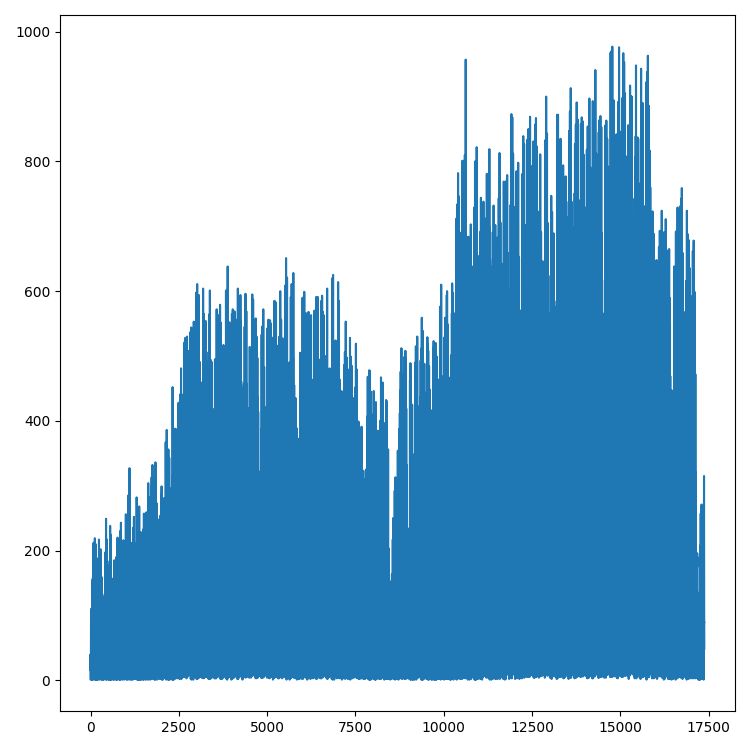

In [1]:
# import graphics library
import matplotlib.pyplot as plt
# clear graphics
plt.clf()
# define variables
x = hour['instant'] # independent variable
y = hour['count'] # dependent variable
# create the plot
plt.plot(x,y)
# display the plot
plt.tight_layout()
plt.savefig("dids1.png") # or plt.show() outside of Org-mode

-   This plot looks more like a painting than a scattering of points:
    this is because there are so many data points - all the rides taken
    out (y-axis) plotted for every hour of two years (x-axis), and
    because the default plot is a lineplot. Using `scatter` instead of
    `plot` gives us an impression of scattered points.



Ridership counts by hour as a scatterplot, with grid lines

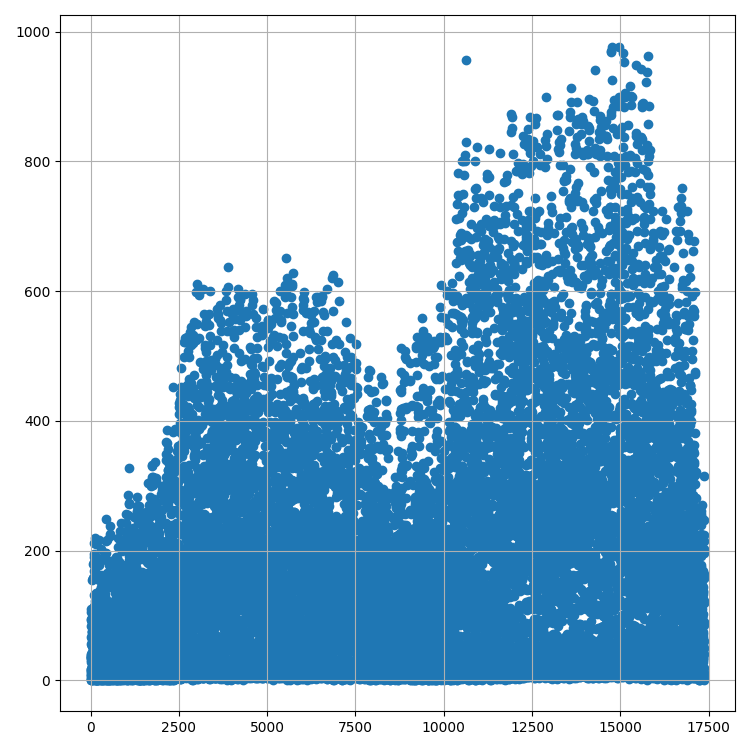

In [1]:
plt.clf()
plt.scatter(x,y)
plt.grid()
plt.tight_layout()
plt.savefig("dids2.png")

-   What information can you get from this plot?
    1.  Seasonal variation: a year has about 8760 hours - the middle
        point of the graph shows a clear minimum. This type of graph with
        two distinct hills is also called *bimodal*.
    2.  Overall trend: the corresponding seasons show that the second
        year of operation was a great deal more successful than the
        first, almost by 50%.
    3.  Statistical summaries: You cannot read their values off readily
        but looking at the gridlinds, you can confirm several of the
        summary statistics by order of magnitude.



## Clarifying plots with titles and labels



-   It wouldn't be easy to explain this plot to someone else. To clarify
    the presentation, we can add labels and a title to the plot.

-   We only need to add a few extra methods. Notice that we're cleaning
    the canvas and redrawing the figure:



Ridership counts by hour, with axis labels and a title

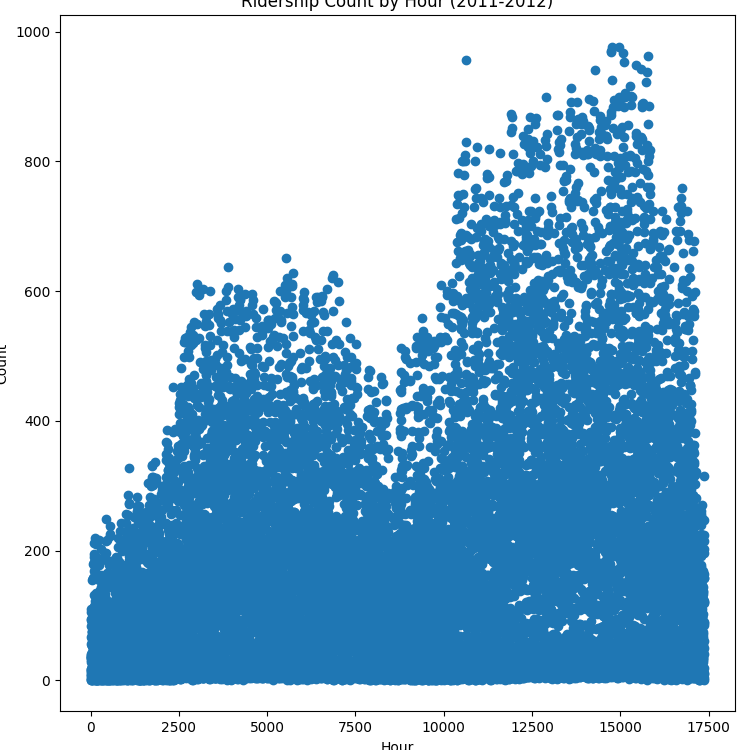

In [1]:
plt.clf()
plt.scatter(x,y)
plt.xlabel("Hour")
plt.ylabel("Count")
plt.title("Ridership Count by Hour (2011-2012)")
plt.savefig("dids3.png")

## Plotting subsets of data



-   The dataset is very large, and looking at all the data at once is
    hard. We use subsetting to plot a smaller subset, for example the
    first 48 hours of 2011 - the second argument to `loc` (`:`) includes *all*
    columns:



Ridership counts by hour for the first 48 hours of 2011

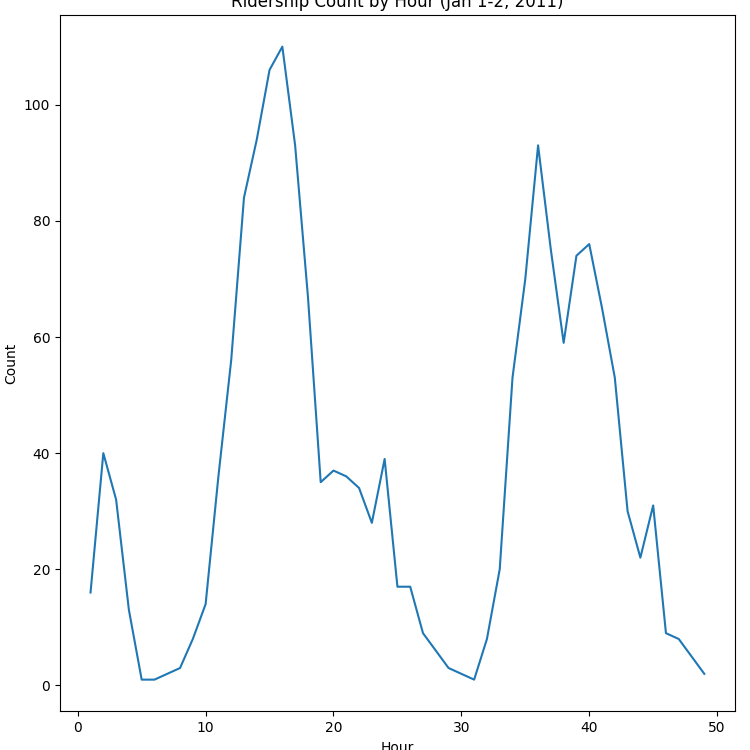

In [1]:
# subset dataset
hour_first_48 = hour.loc[0:48,:]
# data for plotting
x = hour_first_48['instant']
y = hour_first_48['count']
# plotting
plt.clf()
plt.plot(u,v)
plt.xlabel("Hour")
plt.ylabel("Count")
plt.title("Ridership Count by Hour (Jan 1-2, 2011)")
plt.savefig("dids4.png")

## Testing different plot types



-   To properly understand and train yourself in the use of functions
    like `plot`, you must read the [online documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html).

-   There are many ways to alter the appearance of a plot. For example,
    you can a `marker` parameter, which has multiple values to change the
    data points, and the `color` parameter to change the color of the
    graph. ([Source](https://matplotlib.org/stable/api/_as_gen/matplotlib.markers.MarkerStyle.html#matplotlib.markers.MarkerStyle)).

-   In the next plot, we draw the data points as filled circles and
    change the color to green:



Ridership counts by hour for the first 48 hours of 2011 - altered color and markers

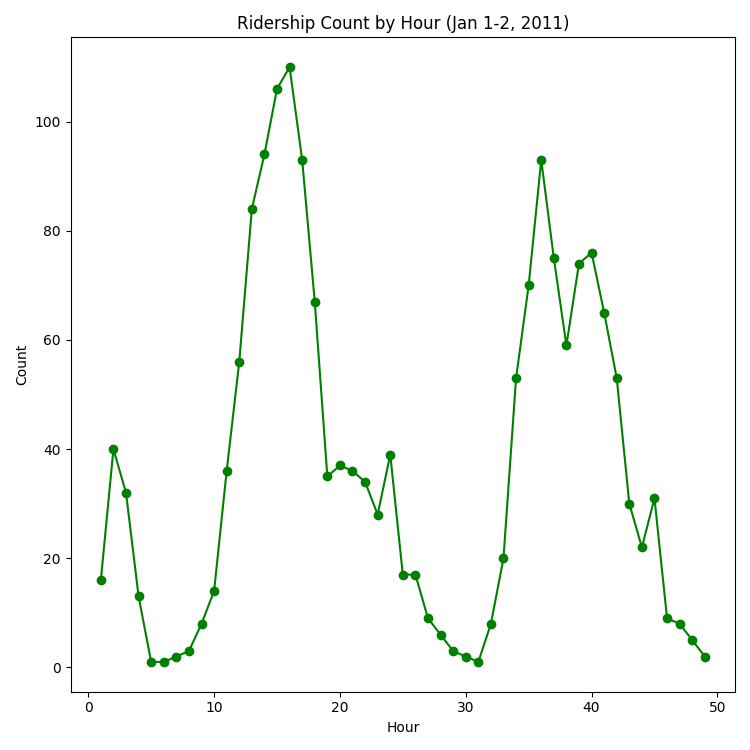

In [1]:
plt.clf()
plt.plot(x,y, color='green', marker='o')
plt.xlabel("Hour")
plt.ylabel("Count")
plt.title("Ridership Count by Hour (Jan 1-2, 2011)")
plt.tight_layout()
plt.savefig("dids5.png")

-   You can alter the line type as well. In the next plot, we show
    `casual` and `registered` riders over the first 2 days of the dataset,
    distinguished by color and linetype. We also introduce the `legend`
    method, which automatically adds a legend for every `label` and `linestyle`.



Ridership counts per hour, first 2 days, for casual and registered users

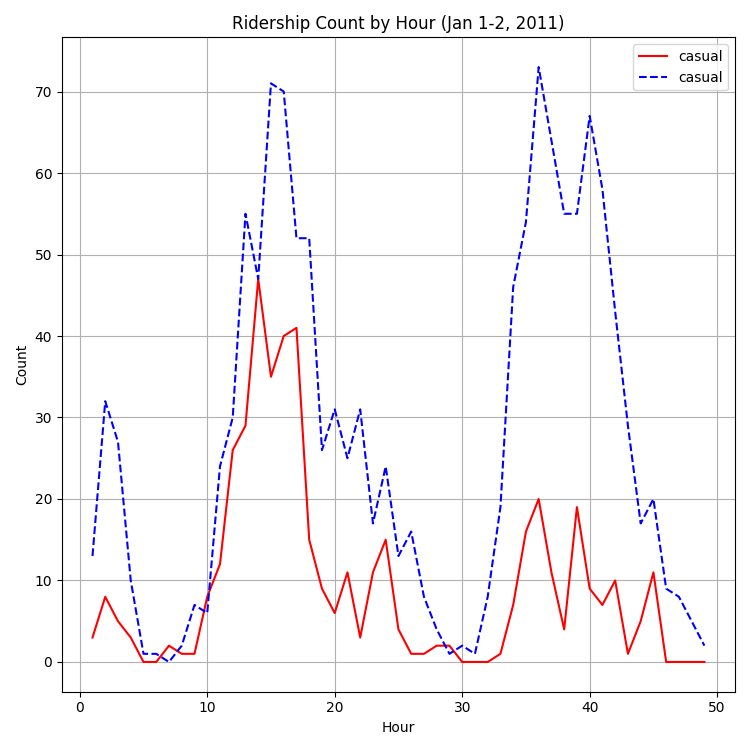

In [1]:
# subsetting
y1 = hour_first_48['casual']
y2 = hour_first_48['registered']
# clear plotting canvas
plt.clf()
## first plot: casual riders
plt.plot(x,y1, color='red', label='casual',linestyle='-')
## second plot: registered riders
plt.plot(x,y2, color='blue', label='casual',linestyle='--')
## labels and title
plt.xlabel("Hour")
plt.ylabel("Count")
plt.title("Ridership Count by Hour (Jan 1-2, 2011)")
plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig("dids6.png")

-   The plot shows that the number of casual riders is almost always
    lower than the number of registered riders. This plot would benefit
    from a legend that explains what the graphs mean.

-   So far we've only seen scatterplots and lineplots. Another
    interesting plot type is the *box plot*, also called "box and
    whiskers" plot.

-   To draw the boxplot, we'll load another package, `seaborn`, which
    works alongside `matplotlib` ([documentation](https://seaborn.pydata.org/generated/seaborn.boxplot.html)):



Boxplot of registered users by hour

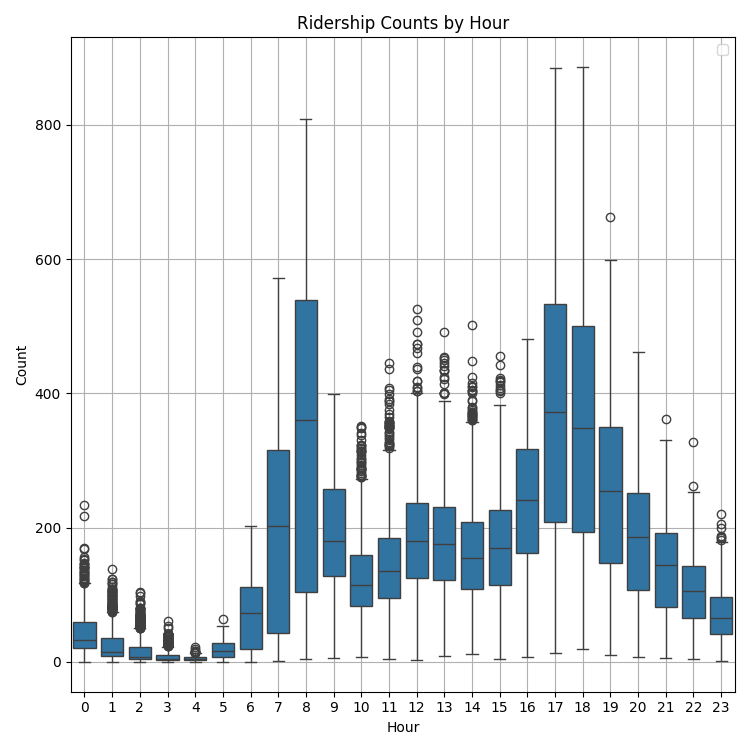

In [1]:
# import seaborn package
import seaborn as sns
# plotting
plt.clf()
sns.boxplot(x='hr',
            y='registered',
            data=hour)
# labelling
plt.xlabel("Hour")
plt.ylabel("Count")
plt.title("Ridership Counts by Hour")
plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig("dids7.png")

-   Let's analyze the plot:
    1.  the independent x variable is the hour column of our `hour` `DataFrame`
    2.  for each hour, the statistical summary is computed and shown as a
        box with whiskers: the lower whisker is the minimum, the upper
        whisker is the maximum, the lower and upper edge of the box are
        the 25% and 75% percentile respectively, and the bar across the
        box is the median (or 50% percentile).
    3.  The individual data points shown above several of the boxes are
        *outliers*, values that don't "fit in the box" and that are too far
        away from the average.
    4.  The format of the `seaborn` `boxplot` is slightly different: you can
        pass the name of the `DataFrame` to the function using the `data`
        parameter.

-   You can now compare ridership at different times of day. You can see
    the impact of rush hour or work commutes between 5-7 am and 5-6 pm.

-   When you're interested in frequency or number of counts of a numeric
    variable, a *histogram* is a useful plot. It uses the `bins` parameter
    to specify the number of bins where each bin contains a range of
    values ([documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html)).



Ridership histogram - frequency of counts

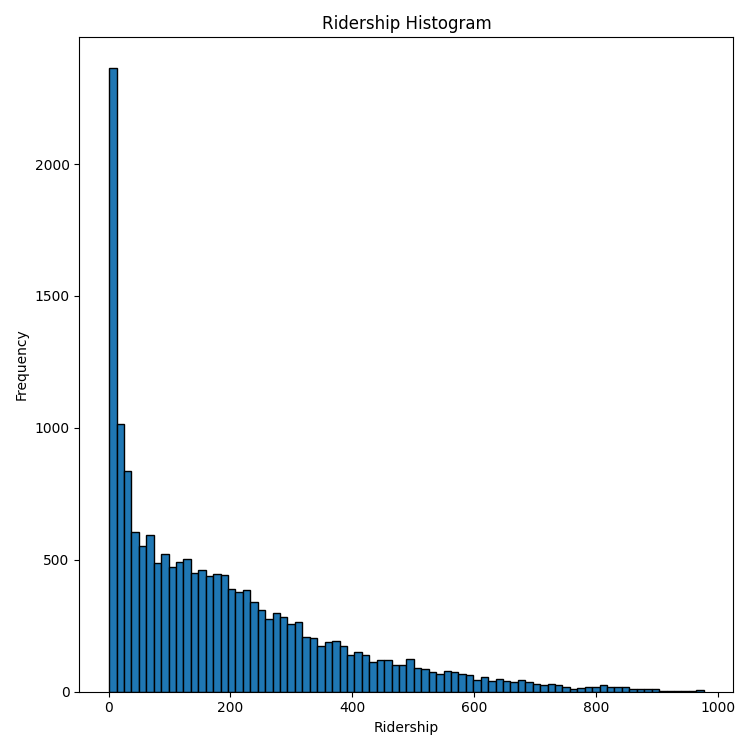

In [1]:
plt.clf()
plt.hist(hour['count'], bins=80, edgecolor='black')
plt.xlabel("Ridership")
plt.ylabel("Frequency")
plt.title("Ridership Histogram")
plt.tight_layout()
plt.savefig("dids8.png")

-   Since the number of bins is fixed, the total ridership is divided
    equally among the total number of bins. You can see that there are
    way more riders in the first bin in our data: for more than 2,000
    hours, ridership was very low. For 500 hours, ridership was
    around 100.

-   A histogram could be used to think about the capacity of the
    company: if you have 1,000 bicycles available, you could probably
    sell 200 of them since very few hours have more than 800 bikes
    rented out.

-   A *pair plot* pairs more than one pair of variables: it draws every
    possible scatterplot for every possible pair of variables in your
    data. For this plot, you don't need to specify the labels:



Pair plot for three variables

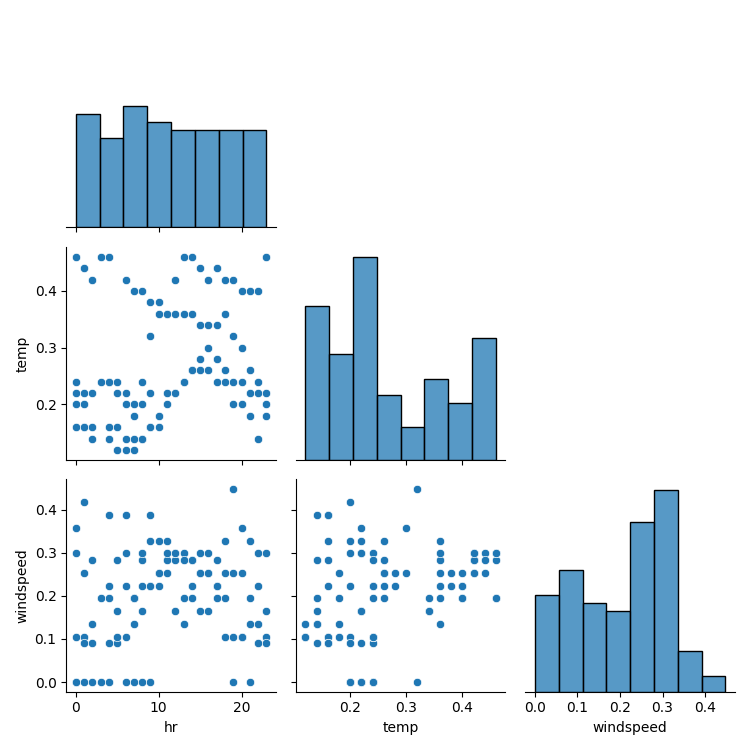

In [1]:
# variables to pair up
vars = ['hr', 'temp', 'windspeed']

# subsetting
hour_first_100 = hour.loc[0:100, vars]

# plotting
plt.clf()
sns.pairplot(hour_first_100, corner=True)
plt.tight_layout()
plt.savefig("dids9.png")

-   The plot contains both scatterplots and histograms. There aren't
    clear patterns among the data points in the scatterplots -
    temperature, windspeed and hour don't seem to be strongly
    correlated, that is they don't exhibit a strong tendency to grow or
    fall together.

-   The study of variables that are coupled is an important part of data
    science because it allows us to indirectly draw conclusions from one
    feature of the data to another feature (for example: holidays and
    ridership); in many cases, we can let go of variables that are so
    strongly correlated that they don't provide new information (that's
    good because carrying variables along eats up computing power); and
    it allows us to simplify visualizations and storytelling.

-   Highly correlated variables are like groups of people where you only
    care about one person so having to deal with the group may be
    boring - even though you may at other times care about the group.

